In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#leer el dataset
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# Preprocesamiento 

He utilizado Profilereport en google colab ya que no me funciona en local

In [3]:
# eliminacion de la columna 'Timestamp' ya que no nos sirve para el analisis
df.drop(columns=['Timestamp'], inplace=True)


In [4]:
# eliminación de duplicados (hay muchos)
df.drop_duplicates(inplace=True)

In [5]:
# Comprobamos si hay valores nulos en el dataset
df.isnull().sum()


Gender                        0
Country                       0
Occupation                    0
self_employed              4803
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [6]:
# Como tenemos muchos datos vamos a permitirnos eliminar las filas que tengan valores nulos
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [8]:
# Reordenar los índices del DataFrame
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
1,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
2,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
3,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
4,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [10]:
#comprobar tipos de datos
df.dtypes

Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

In [11]:
# Para los modelos de machine learning, es mejor convertir las variables categoricas a numericas
df_label = df.copy()
le = LabelEncoder()
for col in df_label.columns:
    df_label[col] = le.fit_transform(df_label[col])
df_label.reset_index(drop=True, inplace=True)
# Comprobamos que se han convertido correctamente
df_label.dtypes


Gender                     int32
Country                    int32
Occupation                 int32
self_employed              int32
family_history             int32
treatment                  int32
Days_Indoors               int32
Growing_Stress             int32
Changes_Habits             int32
Mental_Health_History      int32
Mood_Swings                int32
Coping_Struggles           int32
Work_Interest              int32
Social_Weakness            int32
mental_health_interview    int32
care_options               int32
dtype: object

In [12]:
df_label['Days_Indoors'] = df_label['Days_Indoors'].replace({
    '1-14 days': 1,
    'Go out Every day': 2,
    'More than 2 months': 3,
    '15-30 days': 4,
    '31-60 days': 5
})
df_label['Growing_Stress'] = df_label['Growing_Stress'].replace({'No': 0, 'Yes': 1})
df_label['Changes_Habits'] = df_label['Changes_Habits'].replace({'No': 0, 'Yes': 1})


In [13]:
print(df_label[['Days_Indoors', 'Growing_Stress', 'Changes_Habits']].head())


   Days_Indoors  Growing_Stress  Changes_Habits
0             0               2               1
1             0               2               1
2             0               2               1
3             0               2               1
4             0               2               1


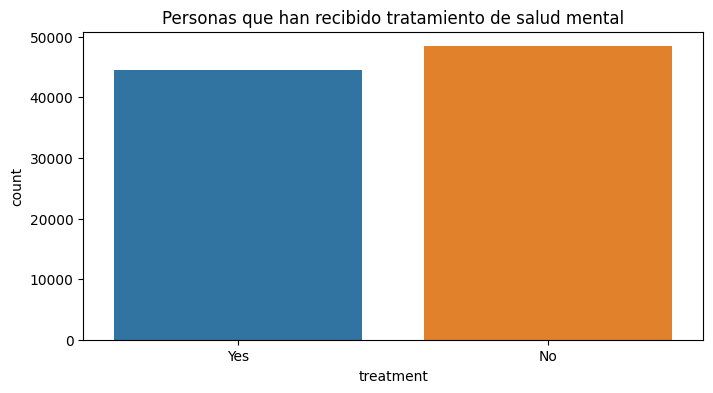

In [14]:

# Visualización simple (ejemplo para la presentación)
plt.figure(figsize=(8,4))
sns.countplot(x="treatment", data=df)
plt.title("Personas que han recibido tratamiento de salud mental")
plt.show()

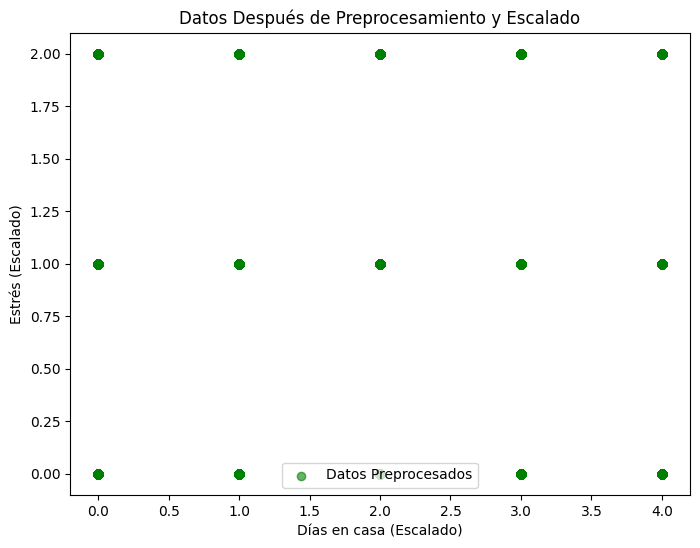

In [15]:
# Visualizar los datos después del preprocesamiento
plt.figure(figsize=(8,6))
plt.scatter(df_label['Days_Indoors'], df_label['Growing_Stress'], label="Datos Preprocesados", color='green', alpha=0.6)
plt.title("Datos Después de Preprocesamiento y Escalado")
plt.xlabel("Días en casa (Escalado)")
plt.ylabel("Estrés (Escalado)")
plt.legend()
plt.show()



In [16]:
# Preparamos los datos numéricos para el VAE
# Escalamos los valores entre 0 y 1 para que funcionen bien en redes neuronales

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_label).astype('float32')  # Conversión a float32 para TensorFlow



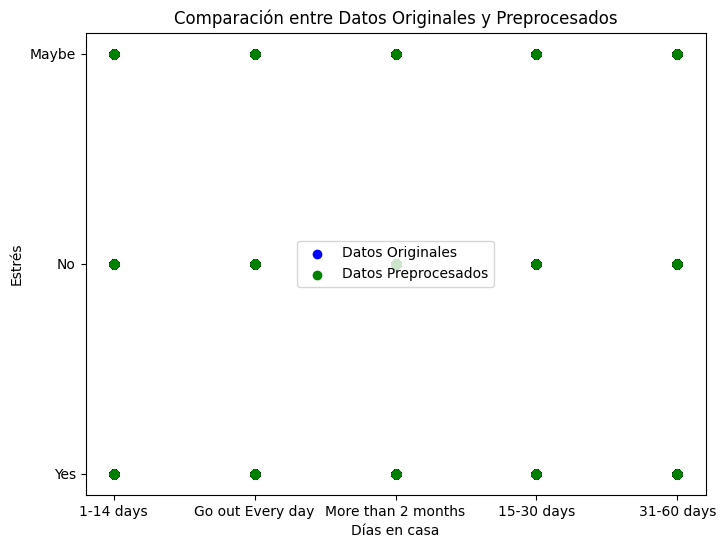

In [31]:
# Gráfico comparativo entre datos originales y transformados
import matplotlib.pyplot as plt
import seaborn as sns

# Graficamos ambos conjuntos de datos: los originales y los preprocesados
plt.figure(figsize=(8,6))

# Gráfico para los datos originales
plt.scatter(df['Days_Indoors'], df['Growing_Stress'], label='Datos Originales', color='blue')

# Gráfico para los datos preprocesados
plt.scatter(df_label['Days_Indoors'], df_label['Growing_Stress'], label='Datos Preprocesados', color='green')

# Títulos y etiquetas
plt.title('Comparación entre Datos Originales y Preprocesados')
plt.xlabel('Días en casa')
plt.ylabel('Estrés')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



In [18]:
#Para ver si esta instalado correctamente tensorflow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [19]:
# Definimos la arquitectura del encoder del VAE
# El encoder toma los datos de entrada y los comprime en una representación latente (z_mean y z_log_var)

from tensorflow.keras import layers, Model, Input
import tensorflow as tf

# Dimensiones del modelo
input_dim = X_scaled.shape[1]   # Número de variables de entrada (columnas del dataset)
latent_dim = 2                  # Dimensión del espacio latente (puede ajustarse)

# Capa de entrada
inputs = Input(shape=(input_dim,))

# Primera capa densa oculta
h = layers.Dense(32, activation='relu')(inputs)

# Salida del encoder: media y varianza logarítmica del espacio latente
z_mean = layers.Dense(latent_dim)(h)
z_log_var = layers.Dense(latent_dim)(h)

# Sampling: genera una variable latente z a partir de z_mean y z_log_var (truco reparametrización)
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Aplicamos la función de sampling
z = layers.Lambda(sampling)([z_mean, z_log_var])
#Ese z vive en el espacio latente y guarda la "esencia" de tu muestra. Luego, el decoder puede usar ese z para reconstruir una versión sintética de esa persona.

# Modelo encoder que devuelve TODO lo que necesita el VAE personalizado
encoder_model = Model(inputs, [z_mean, z_log_var, z])



In [20]:
#Una variable latente o el espacio latente, es una representación interna comprimida de tus datos que no se observa directamente, 
#pero que captura lo esencial o los patrones de los datos reales.

2904/2904 ━━━━━━━━━━━━━━━━━━━━ 2s 717us/step


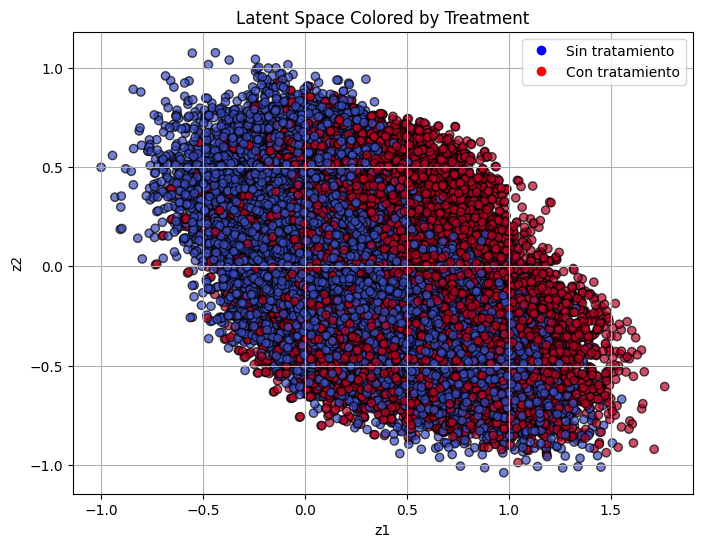

In [21]:
# Visualizamos el espacio latente coloreado por clase ('treatment'): Visualización del encoder

import matplotlib.pyplot as plt
from tensorflow.keras import Model

# Paso 1: Creamos el encoder que llega hasta z_mean
encoder = Model(inputs, z_mean)

# Paso 2: Proyectamos los datos al espacio latente
z_points = encoder.predict(X_scaled)

# Paso 3: Dibujamos los puntos en el plano latente, coloreando por clase
plt.figure(figsize=(8,6))
scatter = plt.scatter(z_points[:, 0], z_points[:, 1], 
                      c=df_label["treatment"], cmap='coolwarm', edgecolor='k', alpha=0.7)

# Opcional: añadir leyenda personalizada
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Sin tratamiento', markerfacecolor='blue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Con tratamiento', markerfacecolor='red', markersize=8)
]
plt.legend(handles=legend_elements)

plt.xlabel("z1")
plt.ylabel("z2")
plt.title("Latent Space Colored by Treatment")
plt.grid(True)
plt.show()


In [22]:
#Cada punto representa una persona del dataset, comprimida en solo 2 dimensiones (z1, z2) por el VAE. Los colores indican si ha recibido tratamiento de salud mental o no. 
#Aunque están mezclados, pueden apreciarse zonas más densas para cada grupo, lo que sugiere que el VAE captó diferencias relevantes en la estructura latente de los datos.

In [23]:
# Definimos el decoder que toma una variable latente z y genera una reconstrucción

decoder_input = Input(shape=(latent_dim,))
h_dec = layers.Dense(32, activation='relu')(decoder_input)
x_decoded = layers.Dense(input_dim, activation='sigmoid')(h_dec)

decoder_model = Model(decoder_input, x_decoded)


In [24]:
# Clase personalizada VAE que hereda de Model
from tensorflow.keras import Model
from tensorflow.keras import backend as K

# Guarda el encoder y decoder que hemos definido
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            # Codificamos los datos (obtenemos media, varianza log y z)
            z_mean, z_log_var, z = self.encoder(data)

            # Decodificamos z
            reconstruction = self.decoder(z)

            # Pérdida de reconstrucción (MSE): Compara los datos originales con los reconstruidos.
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.square(data - reconstruction), axis=1))

            #Pérdida KL (divergencia Kullback-Leibler): Mide la diferencia entre la distribución latente aprendida y una distribución normal estándar. Esto regula el espacio latente para que sea útil.
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))

            #Pérdida total: 
            total_loss = reconstruction_loss + kl_loss

        # Aplicamos gradientes: Esto es lo que ajusta los pesos del encoder y el decoder para que el VAE aprenda.
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Devolvemos métricas para seguimiento
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss
        }


In [25]:
# Creamos una instancia del modelo VAE pasando el encoder y el decoder
vae = VAE(encoder_model, decoder_model)

# Compilamos el modelo con un optimizador
vae.compile(optimizer='adam')

# Entrenamos el modelo (usa tus datos escalados)
history = vae.fit(X_scaled, epochs=30, batch_size=128)

    #El modelo VAE hace lo siguiente en cada época:
        # Toma los datos de entrada (X_scaled).
        # Pasa esos datos por el encoder para obtener z_mean, z_log_var y z.
        # Pasa z por el decoder y obtiene la reconstrucción.
        # Calcula las pérdidas de reconstrucción y KL.
        # Calcula los gradientes y ajusta los pesos del encoder y decoder para minimizar la pérdida total.


Epoch 1/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - kl_loss: 0.0194 - loss: 2.7801 - reconstruction_loss: 2.7607
Epoch 2/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - kl_loss: 0.0013 - loss: 2.7343 - reconstruction_loss: 2.7330
Epoch 3/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 5.2161e-04 - loss: 2.7329 - reconstruction_loss: 2.7324
Epoch 4/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 3.1839e-04 - loss: 2.7324 - reconstruction_loss: 2.7321
Epoch 5/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 2.8562e-04 - loss: 2.7323 - reconstruction_loss: 2.7320
Epoch 6/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - kl_loss: 2.1224e-04 - loss: 2.7323 - reconstruction_loss: 2.7321
Epoch 7/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - kl_loss: 2.2751e-04 - loss: 2.7323 - reconstruction_loss: 2.7321
Epoch 8/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - kl_loss: 1.9133e-04 - loss: 2.7320 - reconstruction_loss: 2.7318
Epoch 9/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl

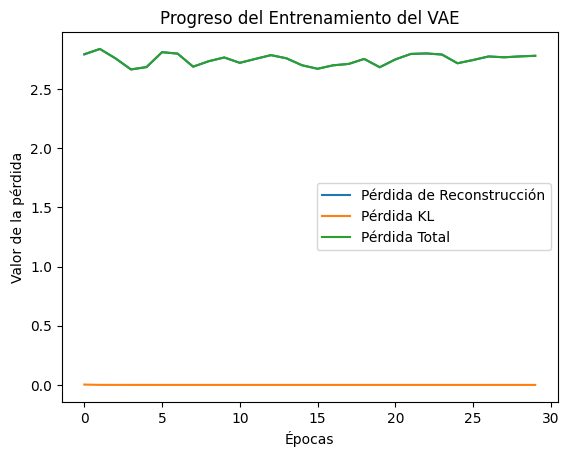

In [26]:
# Gráfico de las pérdidas durante el entrenamiento
import matplotlib.pyplot as plt

# Asumiendo que 'history' contiene las métricas del entrenamiento
plt.plot(history.history['reconstruction_loss'], label='Pérdida de Reconstrucción')
plt.plot(history.history['kl_loss'], label='Pérdida KL')
plt.plot(history.history['loss'], label='Pérdida Total')

plt.xlabel('Épocas')
plt.ylabel('Valor de la pérdida')
plt.legend()
plt.title('Progreso del Entrenamiento del VAE')
plt.show()


In [27]:
# Generar puntos aleatorios en el espacio latente (z)
# Vamos a muestrear desde una distribución normal para obtener los puntos aleatorios en el espacio latente.
import numpy as np

# Número de puntos sintéticos a generar
num_samples = 1000  # Puedes ajustar este valor

# Generamos muestras aleatorias del espacio latente
z_random = np.random.normal(size=(num_samples, latent_dim))  # Utilizamos una distribución normal estándar

# Decodificamos esos puntos en el espacio latente usando el decoder
synthetic_data = vae.decoder(z_random)

# Paso 3: Mostrar o procesar los datos generados
# Por ejemplo, podemos mostrar los primeros datos generados
print(synthetic_data[:5])  # Imprime las primeras 5 muestras sintéticas generadas


tf.Tensor(
[[0.76911545 0.6574415  0.51395977 0.23627502 0.41649544 0.48907074
  0.49153233 0.5063772  0.5243838  0.4926015  0.5141329  0.47539353
  0.47322157 0.4789102  0.40254363 0.45537752]
 [0.773698   0.6542887  0.5144949  0.2182605  0.42991954 0.47551686
  0.49251163 0.49322447 0.52347296 0.48209536 0.5055499  0.48449406
  0.47015938 0.49063525 0.40334773 0.43833616]
 [0.7720164  0.6585206  0.5117498  0.22897168 0.42134193 0.48220044
  0.48837012 0.50041217 0.5217108  0.49184018 0.5141501  0.47062245
  0.47114637 0.4788243  0.40175736 0.4443912 ]
 [0.7689173  0.6574414  0.5139466  0.23682615 0.41585284 0.49023303
  0.49192524 0.50702244 0.52432036 0.49321923 0.5144961  0.47599933
  0.47348216 0.47843856 0.40281874 0.4567886 ]
 [0.7690582  0.65774363 0.51466095 0.24010785 0.4120928  0.4991063
  0.49581042 0.5133422  0.523475   0.49990368 0.5170838  0.48036945
  0.4753436  0.4762709  0.4045145  0.4678354 ]], shape=(5, 16), dtype=float32)


In [35]:
# Convertir el EagerTensor a un array de NumPy
synthetic_data_array = synthetic_data.numpy()

# Crear un DataFrame con el array de NumPy
synthetic_data_df = pd.DataFrame(synthetic_data_array)

# Mostrar las primeras filas del DataFrame
print(synthetic_data_df.head())


         0         1         2         3         4         5         6   \
0  0.769115  0.657441  0.513960  0.236275  0.416495  0.489071  0.491532   
1  0.773698  0.654289  0.514495  0.218260  0.429920  0.475517  0.492512   
2  0.772016  0.658521  0.511750  0.228972  0.421342  0.482200  0.488370   
3  0.768917  0.657441  0.513947  0.236826  0.415853  0.490233  0.491925   
4  0.769058  0.657744  0.514661  0.240108  0.412093  0.499106  0.495810   

         7         8         9         10        11        12        13  \
0  0.506377  0.524384  0.492602  0.514133  0.475394  0.473222  0.478910   
1  0.493224  0.523473  0.482095  0.505550  0.484494  0.470159  0.490635   
2  0.500412  0.521711  0.491840  0.514150  0.470622  0.471146  0.478824   
3  0.507022  0.524320  0.493219  0.514496  0.475999  0.473482  0.478439   
4  0.513342  0.523475  0.499904  0.517084  0.480369  0.475344  0.476271   

         14        15  
0  0.402544  0.455378  
1  0.403348  0.438336  
2  0.401757  0.444391  
3 

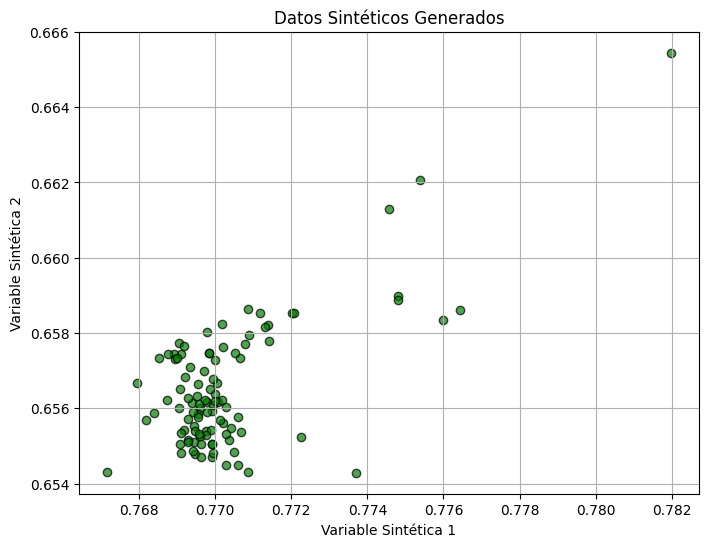

In [36]:
# Visualización de los datos sintéticos generados
import matplotlib.pyplot as plt

# Dibujamos los primeros 100 puntos generados en el espacio latente
plt.figure(figsize=(8, 6))
plt.scatter(synthetic_data[:100, 0], synthetic_data[:100, 1], c='green', edgecolor='k', alpha=0.7)
plt.title("Datos Sintéticos Generados")
plt.xlabel("Variable Sintética 1")
plt.ylabel("Variable Sintética 2")
plt.grid(True)
plt.show()


In [29]:
#Comparación Visual: Datos Originales vs Sintéticos
    #Gráfico de dispersión: Compara los gráficos de dispersión de los datos originales y los generados para ver si los puntos están distribuidos de manera similar.

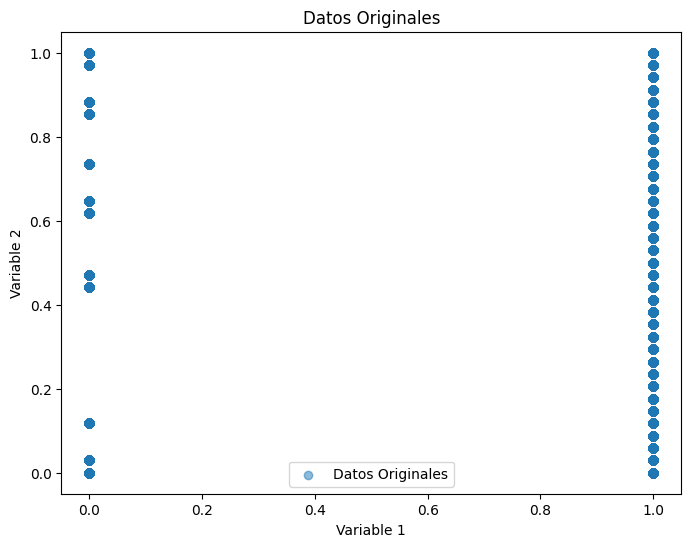

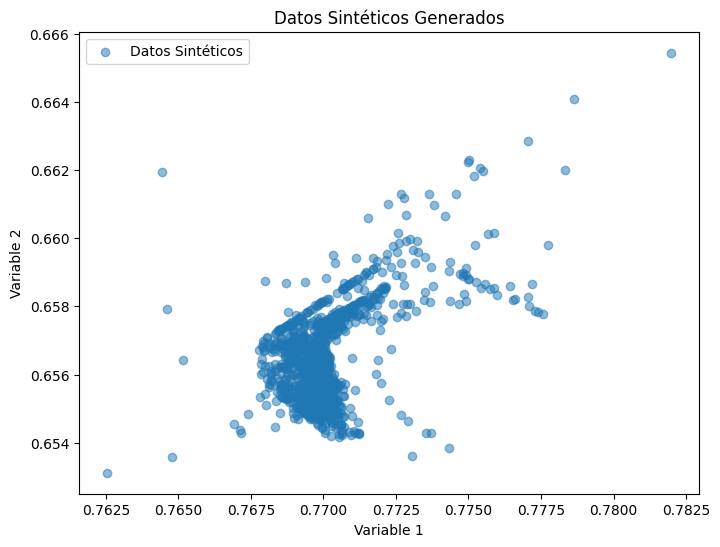

In [30]:
# Visualización de los datos originales
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5, label="Datos Originales")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Datos Originales")
plt.legend()
plt.show()

# Visualización de los datos generados
plt.figure(figsize=(8,6))
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], alpha=0.5, label="Datos Sintéticos")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Datos Sintéticos Generados")
plt.legend()
plt.show()
